In [249]:
import pandas as pd
import os
import plotly.express as px
import numpy as np

In [255]:
path = '../data/bsta_homologs/viking/tables/'
all_dfs = []
for file in os.listdir(path):
    if file.endswith('.tsv'):
        filepath = os.path.join(path, file)
        df_tmp = pd.read_csv(filepath, sep='\t')
        df_tmp['file'] = [file] * len(df_tmp)
        df_tmp = df_tmp.sort_values(by=['query_name','full_score'], ascending=[True, False])
        df = df_tmp.drop_duplicates(subset='query_name')
        all_dfs.append(df)

df_all = pd.concat(all_dfs)

In [215]:
df_all.head()

,target_name,acc,target_len,query_name,acc_2,query_len,full_evalue,full_score,full_bias,dom_num,...,dom_score,dom_bias,hmm_from,hmm_to,ali_from,ali_to,env_from,env_to,acc3,file
0,HTH_Tnp_1,PF01527.20,75,HJKFIDMD_00003,-,167,4.500000e-14,52.5,1.4,1,...,23.3,0.0,7,59,11,64,8,68,0.81,NZ_CAADJH010000002.1_1520985-1521881.tsv
25,rve,PF00665.26,119,HJKFIDMD_00004,-,283,1.400000e-23,83.3,0.1,1,...,-3.0,0.0,73,101,31,60,7,63,0.65,NZ_CAADJH010000002.1_1520985-1521881.tsv
35,DUF4062,PF13271.6,83,HJKFIDMD_00005,-,321,4.500000e-27,94.2,0.0,1,...,92.8,0.0,1,83,6,88,6,88,0.99,NZ_CAADJH010000002.1_1520985-1521881.tsv
49,Ogr_Delta,PF04606.12,47,HJKFIDMD_00006,-,90,1.900000e-15,56.6,4.3,1,...,56.0,4.3,1,47,4,50,4,50,0.97,NZ_CAADJH010000002.1_1520985-1521881.tsv
60,Psu,PF07455.11,174,HJKFIDMD_00007,-,253,5.600000e-02,13.0,5.9,1,...,3.1,2.8,2,32,18,48,17,98,0.85,NZ_CAADJH010000002.1_1520985-1521881.tsv


In [266]:
df_all.to_csv('../data/bsta_homologs/viking/all_pfam.tsv', sep='\t', index=None)

## Bar counts

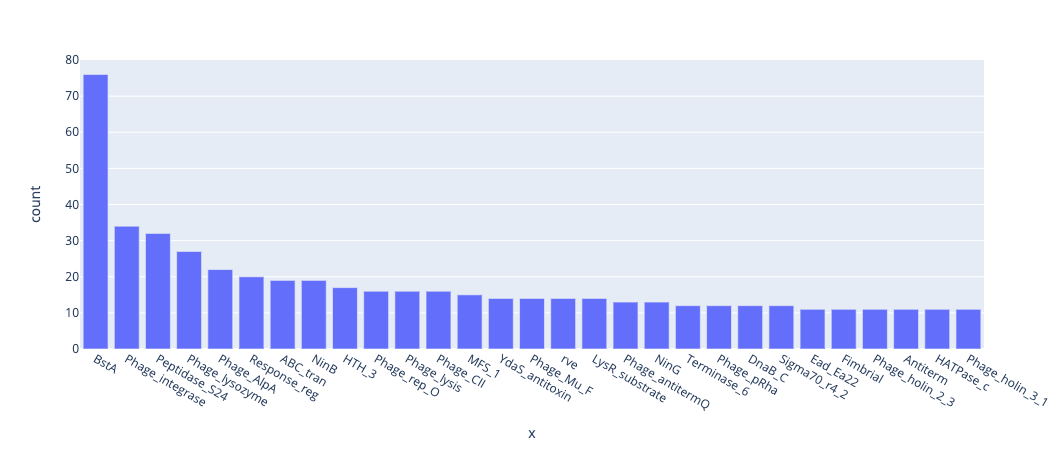

In [257]:
annot = pd.DataFrame(df_all['target_name'].value_counts())
annot.columns=['count']
# more than 10 annotations
annot = annot[annot['count'] > 10]

fig = px.bar(annot, x=annot.index, y='count')
fig.show()

## BstA scores

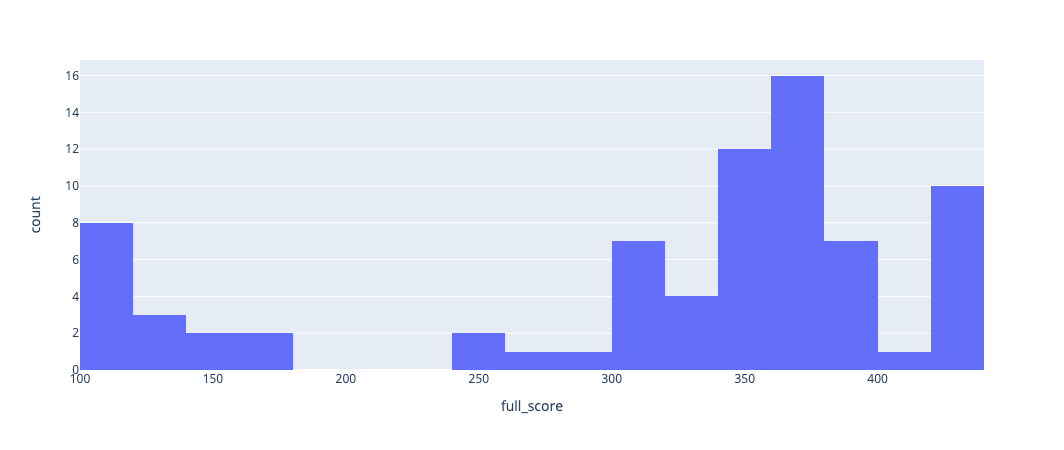

In [258]:
bsta_scores = pd.DataFrame(df_all[df_all['target_name'] == 'BstA'].set_index('file')['full_score'])

fig = px.histogram(bsta_scores, x='full_score', nbins=20)
fig.show()

# Integrate Excel information

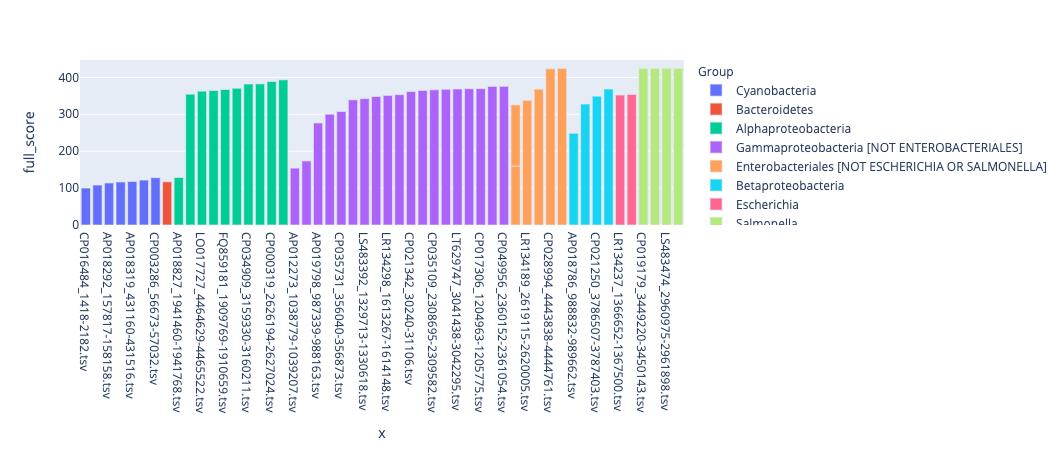

In [260]:
df_xls = pd.read_excel('../data/Curated homolog list.xlsx')

df_xls = df_xls[df_xls['Accession'].notnull()]
df_xls['Hit start'] = df_xls['Hit start'].astype(int)
df_xls['Hit end'] = df_xls['Hit end'].astype(int)

df_xls['file'] = df_xls['Accession'] + '_' + df_xls['Hit start'].astype(str) + '-' + df_xls['Hit end'].astype(str) + '.tsv'
df_xls = df_xls.set_index('file')

join_df = df_xls.join(bsta_scores, how='left', on='file')

de = join_df[join_df['full_score'].notnull()]
de = de.sort_values(by='full_score')

fig = px.bar(de, x=de.index, y='full_score', color='Group')
fig.show()

## Pivot into matrix

In [262]:
cond = df_all[['target_name', 'acc', 'query_name', 'full_score', 'file']].copy()
cond['presence'] = [1] * len(cond)

matrix = pd.pivot_table(cond,
                    values='presence',
                    index=['target_name'],
                    columns='file')
matrix = matrix.fillna(0)

In [263]:
matrix.head()

file,AP010958_3182178-3183047.tsv,AP012273_1038779-1039207.tsv,AP014815_526244-526645.tsv,AP014856_2615578-2616414.tsv,AP018292_157817-158158.tsv,AP018292_296431-296823.tsv,AP018309_126252-126650.tsv,AP018315_504-860.tsv,AP018319_431160-431516.tsv,AP018786_988832-989662.tsv,...,LR134189_2619115-2620005.tsv,LR134234_4557005-4557922.tsv,LR134237_1366652-1367500.tsv,LR134298_1613267-1614148.tsv,LR134516_1625031-1625849.tsv,LS483392_1329713-1330618.tsv,LS483474_2960975-2961898.tsv,LT629747_3041438-3042295.tsv,LT707061_2457781-2458623.tsv,NZ_CAADJH010000002.1_1520985-1521881.tsv
target_name,,,,,,,,,,,,,,,,,,,,,
2OG-FeII_Oxy_2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3-HAO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3HCDH_N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40S_SA_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4HBT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


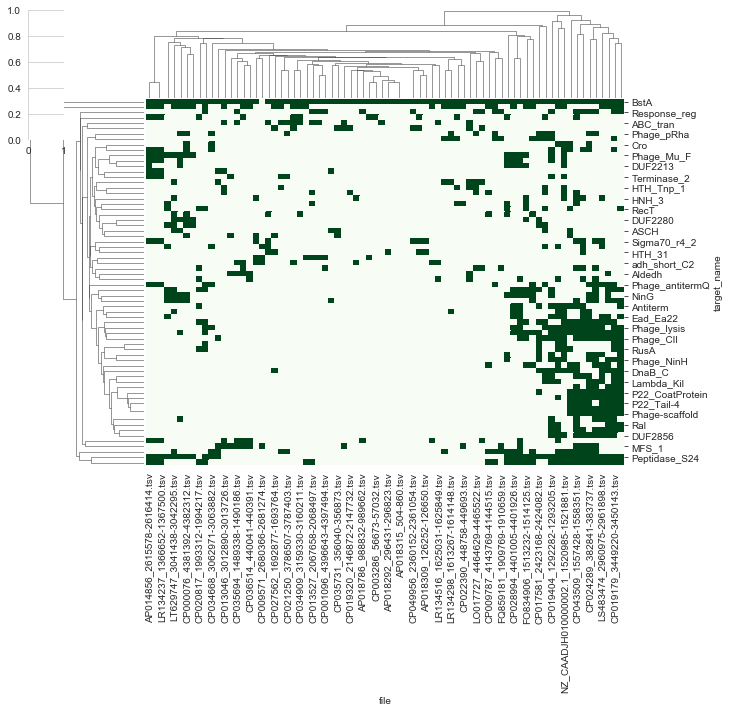

In [264]:
matrix10 = matrix[matrix.sum(axis=1) > 5]

import seaborn as sns
sns.set_style("whitegrid")
clustermap = sns.clustermap(matrix10.fillna(0), cmap="Greens", cbar=False)

In [250]:
df_m = clustermap.data2d
df_m = df_m.replace(0, np.nan)

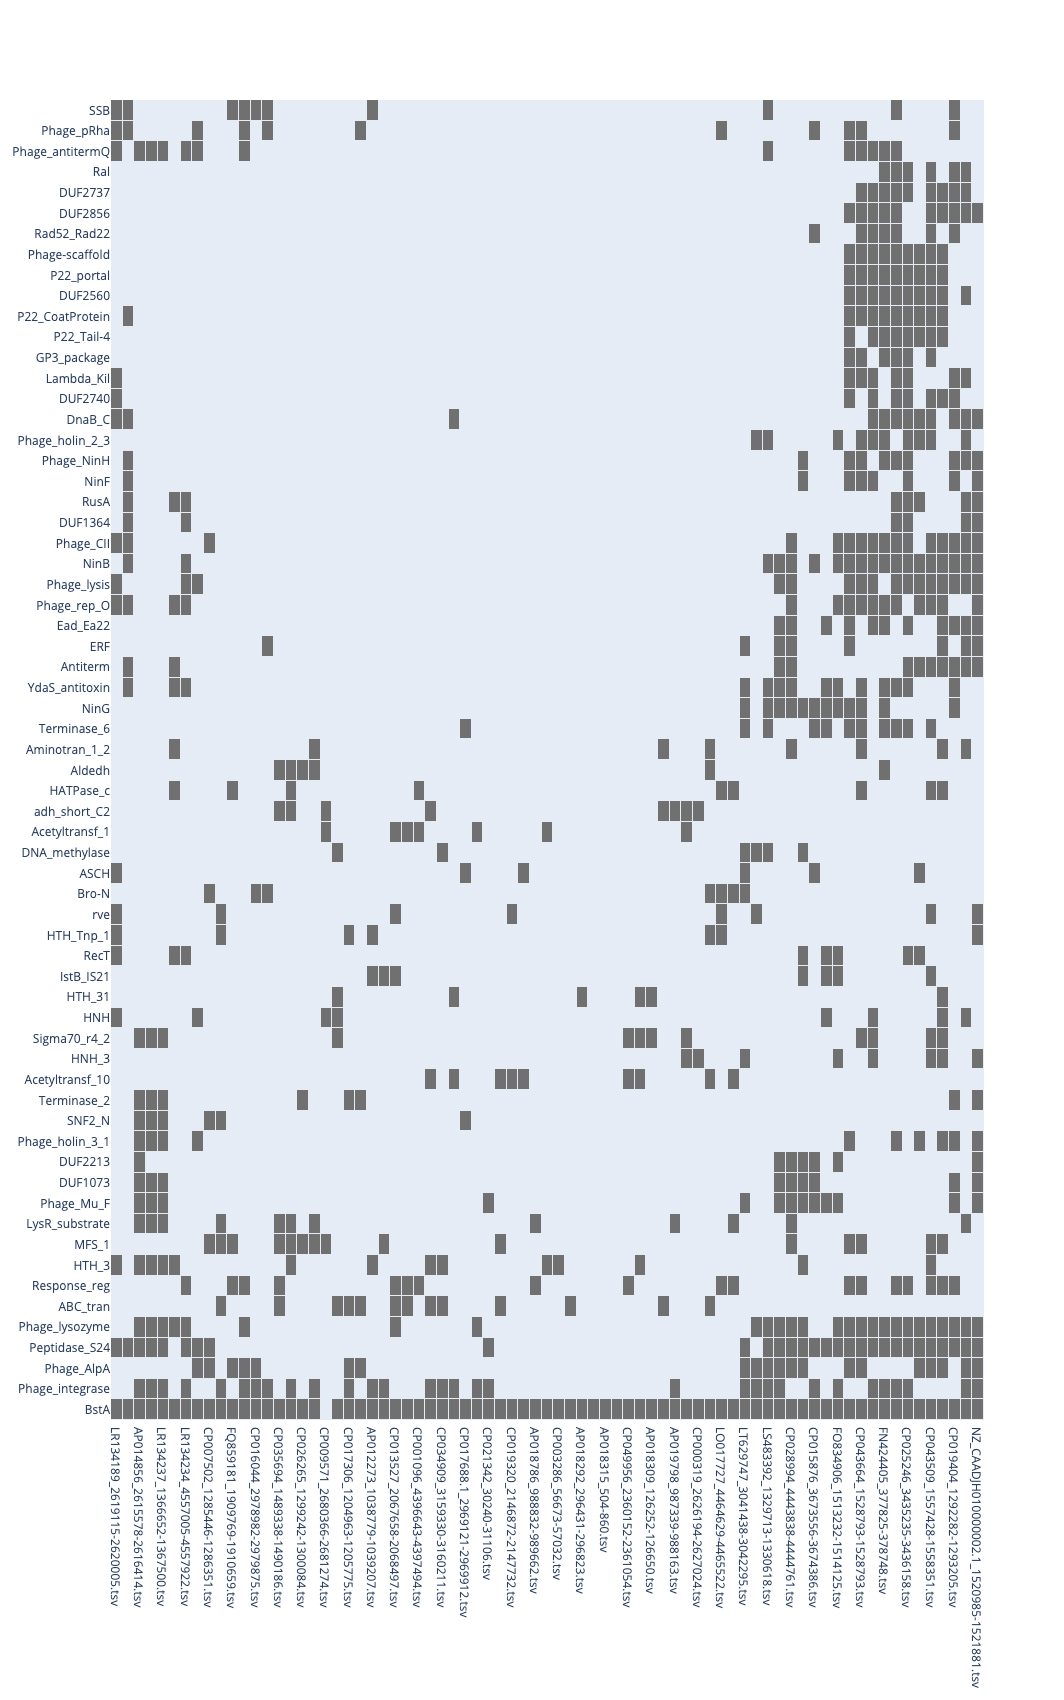

In [265]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(z=df_m.values,
                                x=df_m.columns,
                                y=df_m.index,
                                hoverongaps = False,
                                hoverinfo='y+x',
                                colorscale='gray',
                                ygap=1,
                                xgap=1,
                                showscale=False))

fig.update_layout(width = 1000, height = 1700,
                  xaxis={'showgrid':False},
                  yaxis={'showgrid':False},
                  autosize=False,
                  showlegend=False)
fig.show()

In [254]:
df[df['Accession'] == 'CP009571']

,Strain,Accession,Hit start,Hit end,Strand,Hit gene ID,Hit gene protein id,Taxonoomy,Phage?,Annotation of hit gene,Group,Unnamed: 11
24,Sphingomonas taxi strain ATCC 55669,CP009571,2680366.0,2681274.0,+,NaN,NaN,Bacteria; Proteobacteria; Alphaproteobacteria;...,NaN,NaN,Alphaproteobacteria,NaN
